# Proyek Analisis Data: E-Commerce Public Dataset

- **Nama:** M. Bhayaziid Amalin
- **Email:** mbhayaziidamalin@gmail.com
- **ID Dicoding:** ziidsbox


## Menentukan Pertanyaan Bisnis


- Dari negara bagian mana pelanggan cenderung menggunakan cicilan, dan seberapa sering pelanggan memilih cicilan lebih dari 3 kali untuk kategori produk tertentu di tahun 2017?
- Bagaimana perbandingan tingkat ketepatan waktu pengiriman selama periode puncak (November - Desember) 2017 dibandingkan dengan rata-rata bulanan ditahun yang sama?


## Import Semua Packages/Library yang Digunakan


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data


In [173]:
customers_df_ziid = pd.read_csv("data\customers_dataset.csv")
customers_df_ziid.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17568\1782393440.py:1: SyntaxWarning: invalid escape sequence '\c'
  customers_df_ziid = pd.read_csv("data\customers_dataset.csv")


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [90]:
orders_df_ziid = pd.read_csv("data\orders_dataset.csv")
orders_df_ziid.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17568\1866270885.py:1: SyntaxWarning: invalid escape sequence '\o'
  orders_df_ziid = pd.read_csv("data\orders_dataset.csv")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [91]:
order_items_df_ziid = pd.read_csv("data\order_items_dataset.csv")
order_items_df_ziid.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17568\100958634.py:1: SyntaxWarning: invalid escape sequence '\o'
  order_items_df_ziid = pd.read_csv("data\order_items_dataset.csv")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [92]:
order_payments_df_ziid = pd.read_csv("data\order_payments_dataset.csv")
order_payments_df_ziid.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17568\561404266.py:1: SyntaxWarning: invalid escape sequence '\o'
  order_payments_df_ziid = pd.read_csv("data\order_payments_dataset.csv")


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [93]:
products_df_ziid = pd.read_csv("data\products_dataset.csv")
products_df_ziid.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17568\275472682.py:1: SyntaxWarning: invalid escape sequence '\p'
  products_df_ziid = pd.read_csv("data\products_dataset.csv")


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [94]:
product_category_name_df_ziid = pd.read_csv("data\product_category_name_translation.csv")
product_category_name_df_ziid.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17568\2247029784.py:1: SyntaxWarning: invalid escape sequence '\p'
  product_category_name_df_ziid = pd.read_csv("data\product_category_name_translation.csv")


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**

- dapat mengidentifikasi bagaimana menyambungkan tabel customers,orders dan order payments untuk mengetahui asal customer yang cenderung menggunakan cicilan
- terdapat kolom date delivered carrier date dan juga delivered customer date yang dapat digunakan untuk menganalisis perbandingan kecepatan waktu pengiriman


### Assessing Data


#### Menilai tabel `customers_df_ziid`


In [95]:
customers_df_ziid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [96]:
customers_df_ziid.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [97]:
print("Jumlah duplikasi pada value: ", customers_df_ziid.duplicated().sum())

Jumlah duplikasi pada value:  0


#### Menilai tabel `orders_df_ziid`


In [98]:
orders_df_ziid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [99]:
orders_df_ziid.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [100]:
orders_df_ziid.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [101]:
print("Jumlah duplikasi pada value: ", orders_df_ziid.duplicated().sum())

Jumlah duplikasi pada value:  0


####Menilai tabel `order_items_df_ziid`


In [102]:
order_items_df_ziid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [103]:
order_items_df_ziid.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [104]:
order_items_df_ziid.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [105]:
print("Jumlah duplikasi pada value: ",order_items_df_ziid.duplicated().sum())

Jumlah duplikasi pada value:  0


#### Menilai tabel `order_payments_df_ziid`


In [106]:
order_payments_df_ziid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [107]:
order_payments_df_ziid.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [108]:
order_payments_df_ziid.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [109]:
print(order_payments_df_ziid['payment_type'].unique())

['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [110]:
print("Jumlah duplikasi pada value: ", order_payments_df_ziid.duplicated().sum())

Jumlah duplikasi pada value:  0


In [111]:
order_payments_df_ziid.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####Menilai data `products_df_ziid`


In [112]:
products_df_ziid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [113]:
products_df_ziid.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [114]:
products_df_ziid.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [115]:
print("Jumlah duplikasi pada value: ",products_df_ziid.duplicated().sum())

Jumlah duplikasi pada value:  0


####Menilai data `product_category_name_df_ziid`


In [116]:
product_category_name_df_ziid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [117]:
product_category_name_df_ziid.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [118]:
product_category_name_df_ziid.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

In [119]:
print("Jumlah duplikasi pada value: ",product_category_name_df_ziid.duplicated().sum())

Jumlah duplikasi pada value:  0


**Insight:**

- Ada beberapa value duplikasi dan juga null pada dataframe yang telah di asses
- dapat melihat korelasi dataframe yang dapat di merge untuk mendapatkan hasil dari pertanyaan


### Cleaning Data


menggunakan drop duplicates dengan parameter subset geolocation_zip_code_prefix untuk menghapus value zip_code yang sama


####Cleaning data `orders_df_ziid`


In [120]:
orders_df_ziid = orders_df_ziid.dropna(subset=['order_approved_at'])

In [121]:
orders_df_ziid = orders_df_ziid.dropna(subset=['order_delivered_customer_date'])

In [122]:
orders_df_ziid = orders_df_ziid.dropna(subset=['order_delivered_carrier_date'])

In [123]:
orders_df_ziid =  orders_df_ziid[orders_df_ziid['order_status'] == 'delivered']

In [124]:
orders_df_ziid.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Drop semua kolom yang mempunyai value null dan juga membuat filter hanya untuk order_status = 'delivered'


In [125]:
orders_df_ziid.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


####Cleaning data `products_df_ziid`


In [126]:
products_df_ziid = products_df_ziid.dropna(subset=['product_category_name'])

In [127]:
products_df_ziid = products_df_ziid.dropna(subset=['product_weight_g'])

In [128]:
products_df_ziid.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [129]:
products_df_ziid.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**

- terdapat banyak duplikasi dan nilai null pada sebuah kolom namun ada beberapa alasan seperti di orders_df ada beberapa kolom order_delivered_customer_date yang memiliki nilai null karena order_status yang belum 'delivered'
- ada beberapa product name yang berisikan random value yang berkorelasi dengan null value pada suatu row


## Exploratory Data Analysis (EDA)


### Explore ...


####Explore `customers_df_ziid`


In [130]:
customers_df_ziid.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
27116,360ae0b3d851642a2c7e5d737e93140b,6253003ce4a1dca3ebc37294bfe2b73a,29135,viana,ES
91376,d4b436a493460b0d94761264ecaa51f4,2e644653c7c93fc9020ef771ce505845,35701,sete lagoas,MG
78442,c6f1bf6be1b8ab642cc2dd066aca9b1e,e51a69059febdb417ce8df47a58aa668,4864,sao paulo,SP
74146,5a0e6eb50e11d5cb0063f682bfb6d0f1,9554d5a73d1ded2b9f7b8d5f38aac3c3,89665,capinzal,SC
35510,2f5f1572415e02d8955c27c1f5b462b5,d4bd5654b8fe422766fe81834793a59a,13211,jundiai,SP


In [131]:
customers_df_ziid.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [132]:
customers_df_ziid.customer_id.is_unique

True

In [133]:
customers_df_ziid.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [134]:
customers_df_ziid.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

####Explore `orders_df_ziid`


In [135]:
orders_df_ziid.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6911,14fda766f6a1e0a37886b3e8fcf8bde1,0e1cf9332ab9b502f469458da2a5e7e9,delivered,2018-04-01 22:38:52,2018-04-01 22:50:16,2018-04-04 22:10:53,2018-04-11 14:48:22,2018-05-04 00:00:00
40605,25e4af6ebff2dfb6213c8cc7e36ecbed,921df0e199c57f4fd686b8a141fb9b86,delivered,2017-02-07 20:31:37,2017-02-07 20:45:20,2017-02-21 06:06:14,2017-03-03 16:54:03,2017-03-08 00:00:00
70558,aaefff6521e66b3e5c88bb2c93b9bc72,a9b14551e3b3b65aafda561259f08f03,delivered,2017-02-10 17:40:30,2017-02-10 17:50:14,2017-02-11 09:34:05,2017-02-24 07:41:19,2017-03-10 00:00:00
58970,1f84f9ceb5c60dc9d3ecb4bbc0555dfa,c2f95153645e6d3add0e3c41a8689bfd,delivered,2017-10-23 21:21:17,2017-10-23 22:28:20,2017-10-24 22:33:17,2017-10-31 18:40:04,2017-11-17 00:00:00
8471,e95c17e37b96427efd69412b0cc4a881,ec7ec1275ebdd28f29b049a22925adf9,delivered,2017-04-23 12:45:18,2017-04-25 08:15:29,2017-04-25 08:45:25,2017-05-06 10:55:35,2017-05-12 00:00:00


In [136]:
orders_df_ziid.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96455,96455,96455,96455,96455,96455,96455,96455
unique,96455,96455,1,95933,88266,80094,95643,445
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2017-11-20 11:46:30,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507


Banyak pesanan yang sampai pada bulan april 2018 daripada periode yang lain


In [137]:
orders_df_ziid.groupby(by="order_status").customer_id.count()

order_status
delivered    96455
Name: customer_id, dtype: int64

####Explore `order_payments_df_ziid`


In [138]:
order_payments_df_ziid.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
86972,12281975d2de5af133e549f49a1b9093,1,boleto,1,115.45
88547,0693ed674763a4fc34e2c763c7fd25c2,1,boleto,1,642.62
85358,60753b0d826f7ab796f24eaf861690eb,1,credit_card,4,116.94
95477,445af51c029e740dfb8f62d31375b889,1,credit_card,5,50.00
1318,a1bb68068326efb8e9c0bfa0e0a02466,1,credit_card,5,50.95


In [139]:
order_payments_df_ziid.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [140]:
order_payments_df_ziid.payment_installments.is_unique

False

In [141]:
order_payments_df_ziid.groupby(by="payment_installments").order_id.count()

payment_installments
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: order_id, dtype: int64

####Explore `order_items_df_ziid`


In [142]:
order_items_df_ziid.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
64066,9257ba43d1349df1fe69c0fdcf214056,1,80b5182ab2afa5091844c94a0106b843,0ebd97a106433a45a4aebe57c1799778,2018-05-15 17:10:29,69.90,22.99
79098,b3f296816426c556cdf428974ffa9543,1,2a2d22ae30e026f1893083c8405ca522,1a3df491d1c4f1589fc2b934ada68bf2,2017-07-25 14:04:33,134.90,23.81
50334,72652c482c51119a0a338edba23e0027,1,a869ec6209c361ca46dad85a5530e119,54c04bdb5ec46762f8f08c7e8f86ed4a,2018-08-14 13:05:22,148.80,24.91
39443,59ad2910ac1515ca2b7aee1754686306,1,af532b7b70d7b3c1a2f042eb10fed9be,fa1c13f2614d7b5c4749cbc52fecda94,2018-02-07 14:53:15,299.90,9.35
83722,be232325c4a25099b3bd0015b73141cf,1,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,2017-06-12 18:55:14,42.99,15.10


In [143]:
order_items_df_ziid.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [144]:
order_items_df_ziid.groupby(by="product_id").order_item_id.count()

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
00088930e925c41fd95ebfe695fd2655    1
0009406fd7479715e4bef61dd91f2462    1
000b8f95fcb9e0096488278317764d19    2
000d9be29b5207b54e86aa1b1ac54872    1
                                   ..
fff6177642830a9a94a0f2cba5e476d1    2
fff81cc3158d2725c0655ab9ba0f712c    1
fff9553ac224cec9d15d49f5a263411f    1
fffdb2d0ec8d6a61f0a0a0db3f25b441    5
fffe9eeff12fcbd74a2f2b007dde0c58    1
Name: order_item_id, Length: 32951, dtype: int64

####Explore `products_df_ziid`


In [145]:
products_df_ziid.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
31417,9ef2ca01151ef53318695e8a1e8053da,esporte_lazer,45.0,3910.0,1.0,200.0,20.0,10.0,15.0
20772,0d04a8284bd80aba2723d62bdb330b4d,automotivo,63.0,555.0,3.0,150.0,20.0,6.0,14.0
32371,38d81441a145665231f53df8e97f52e5,construcao_ferramentas_jardim,53.0,480.0,1.0,1500.0,50.0,16.0,44.0
1209,41b32e93d4f4db03491412efc40f3c91,relogios_presentes,58.0,485.0,3.0,1000.0,17.0,10.0,16.0
31407,4399b75e654e8e2bf9f92967caa66c5f,telefonia,30.0,875.0,2.0,300.0,21.0,11.0,14.0


In [146]:
products_df_ziid.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


####Explore `product_category_name_df_ziid`


In [147]:
product_category_name_df_ziid.sample(5)

,product_category_name,product_category_name_english
43,construcao_ferramentas_iluminacao,construction_tools_lights
17,fashion_bolsas_e_acessorios,fashion_bags_accessories
55,fashion_roupa_feminina,fashio_female_clothing
53,pcs,computers
34,artigos_de_festas,party_supplies


In [148]:
product_category_name_df_ziid.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####Explore penggabungan data


#####Menggabungkan data `customers_df_ziid` dan `orders_df_ziid`


In [149]:
gabungan_df = pd.merge(customers_df_ziid, orders_df_ziid, on='customer_id', how='inner')
gabungan_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [150]:
gabungan_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    40488
RJ    12348
MG    11351
RS     5342
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
Name: order_id, dtype: int64

#####Menggabungkan data `gabungan_df` dan `order_payments_df_ziid`


In [151]:
gabungan_df = pd.merge(gabungan_df, order_payments_df_ziid, on='order_id', how='inner')
gabungan_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,credit_card,8,252.25


######Membuat filter untuk tahun 2017 dan mengelompokkan cicilan customer berdasarkan negara bagian


In [152]:
gabungan_df['order_purchase_timestamp'] = pd.to_datetime(gabungan_df['order_purchase_timestamp'])

mengubah value order_purchase_timestamp menjadi data type date_time


In [153]:
gabungan_df['order_purchase_year'] = gabungan_df['order_purchase_timestamp'].dt.year

mengekstrak tahun dari order_purchase_timestamp


In [154]:
tahun_2017_df = gabungan_df[gabungan_df['order_purchase_year'] == 2017]

memfilter dataframe gabungan_df yang hanya kolum order_purchase_year yang memiliki tahun 2017


In [155]:
cicilan_negara_bagian = tahun_2017_df.groupby(['customer_state', 'payment_installments'])['order_id'].count().unstack().fillna(0)

Mengelompokkan cicilan customer berdasarkan negara bagian


######Memfilter dan memodifikasi data value pada timestamp dan date pada dataset `order_payments_df_ziid`


In [156]:
date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    orders_df_ziid[col] = pd.to_datetime(orders_df_ziid[col])

Mengkonversi date_columns menjadi datetime


In [157]:
orders_2017_df = orders_df_ziid[orders_df_ziid['order_purchase_timestamp'].dt.year == 2017]

In [158]:
orders_2017_df['delivery_difference'] = (orders_2017_df['order_delivered_customer_date'] - orders_2017_df['order_estimated_delivery_date']).dt.days

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17568\4120379583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2017_df['delivery_difference'] = (orders_2017_df['order_delivered_customer_date'] - orders_2017_df['order_estimated_delivery_date']).dt.days


In [159]:
tepat_waktu_bulanan = orders_2017_df.groupby(orders_2017_df['order_purchase_timestamp'].dt.month).apply(lambda df: (df['delivery_difference'] <= 0).mean() * 100)

In [160]:
periode_puncak = orders_2017_df[orders_2017_df['order_purchase_timestamp'].dt.month.isin([11, 12])]

In [161]:
tepat_waktu_puncak = (periode_puncak['delivery_difference'] <= 0).mean() * 100

In [162]:
average_tepat_waktu_bulanan = tepat_waktu_bulanan.mean()

In [163]:
print(f"Tingkat pengiriman tepat waktu selama periode puncak (Nov-Des 2017): {tepat_waktu_puncak:.2f}%")
print(f"Rata-rata tingkat pengiriman tepat waktu bulanan pada 2017: {average_tepat_waktu_bulanan:.2f}%")

Tingkat pengiriman tepat waktu selama periode puncak (Nov-Des 2017): 89.73%
Rata-rata tingkat pengiriman tepat waktu bulanan pada 2017: 95.24%


#####Menggabungkan data `gabungan_df` dan `order_items_df_ziid`


In [164]:
gabungan_df = pd.merge(gabungan_df, order_items_df_ziid, on='order_id', how='inner')
gabungan_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,order_purchase_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,credit_card,2,146.87,2017,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,credit_card,8,335.48,2018,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,credit_card,7,157.73,2018,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,credit_card,1,173.30,2018,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,credit_card,8,252.25,2018,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


#####Menggabungkan data `gabungan_df` dan `products_df_ziid`


In [165]:
gabungan_df = pd.merge(gabungan_df, products_df_ziid, on='product_id', how='inner')
gabungan_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


#####Menggabungkan data `gabungan_df` dan `product_category_name_df_ziid`


In [166]:
gabungan_df = pd.merge(gabungan_df, product_category_name_df_ziid, on='product_category_name', how='left')
gabungan_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


######Mengelompokkan kategori produk yang dibeli dengan cicilan lebih dari 3


In [167]:
cicilan_category_lebih_3 = gabungan_df[gabungan_df['payment_installments'] > 3].groupby('product_category_name_english').size().sort_values(ascending=False)
print(cicilan_category_lebih_3)

product_category_name_english
bed_bath_table               4600
health_beauty                2972
furniture_decor              2593
watches_gifts                2521
housewares                   2141
                             ... 
cds_dvds_musicals               4
arts_and_craftmanship           3
home_comfort_2                  2
flowers                         1
fashion_childrens_clothes       1
Length: 70, dtype: int64


**Insight:**

- Menggabungkan dataset dataset yang telah dibuat dapat bisa melihat dan mengexplore data-data yang ada juga memungkinkan membuat sebuah perbandingan terhadap suatu kasus


## Visualization & Explanatory Analysis


### Pertanyaan 1: Dari negara bagian mana pelanggan cenderung menggunakan cicilan, dan seberapa sering pelanggan memilih cicilan lebih dari 3 kali untuk kategori produk tertentu di tahun 2017?


In [168]:
#menyimban value untuk negara bagian dari terbesar ke terkecil
negara_cicilan_teratas = cicilan_negara_bagian.sum(axis=1).sort_values(ascending=False)


plt.style.use('ggplot')
sns.set_palette("viridis")


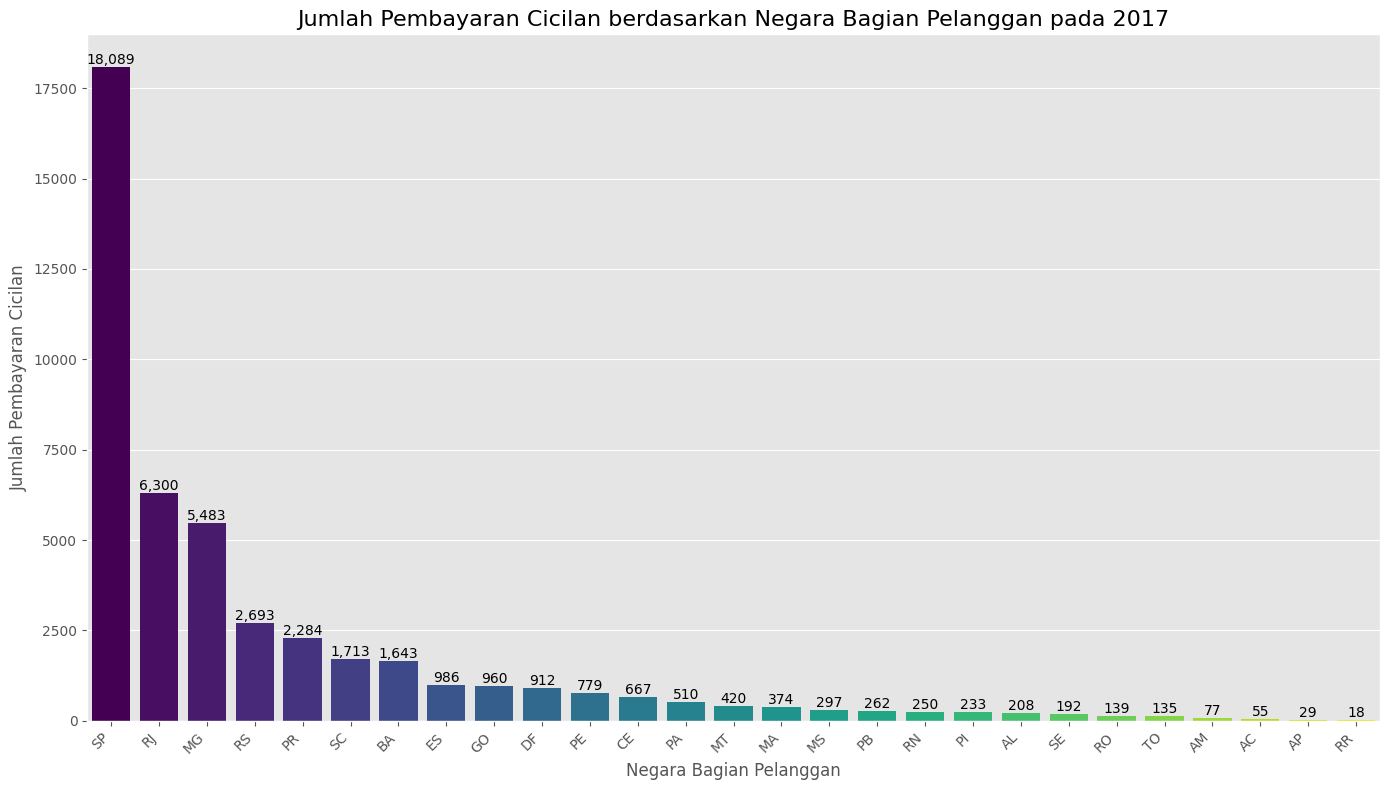

In [169]:
# 1. Visualisasi Pembayaran Cicilan berdasarkan Negara Bagian Pelanggan
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=negara_cicilan_teratas.index, y=negara_cicilan_teratas.values)
plt.xlabel('Negara Bagian Pelanggan', fontsize=12)
plt.ylabel('Jumlah Pembayaran Cicilan', fontsize=12)
plt.title('Jumlah Pembayaran Cicilan berdasarkan Negara Bagian Pelanggan pada 2017', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Tambahkan label nilai di atas setiap batang
for i, nilai in enumerate(negara_cicilan_teratas.values):
    ax.text(i, nilai, f'{nilai:,.0f}', ha='center', va='bottom')

# Tambahkan gradien warna pada batang
jumlah_negara_bagian = len(negara_cicilan_teratas)
warna_gradien = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0, vmax=jumlah_negara_bagian))
for i, batang in enumerate(ax.patches):
    batang.set_facecolor(warna_gradien.to_rgba(i))

plt.tight_layout()
plt.show()

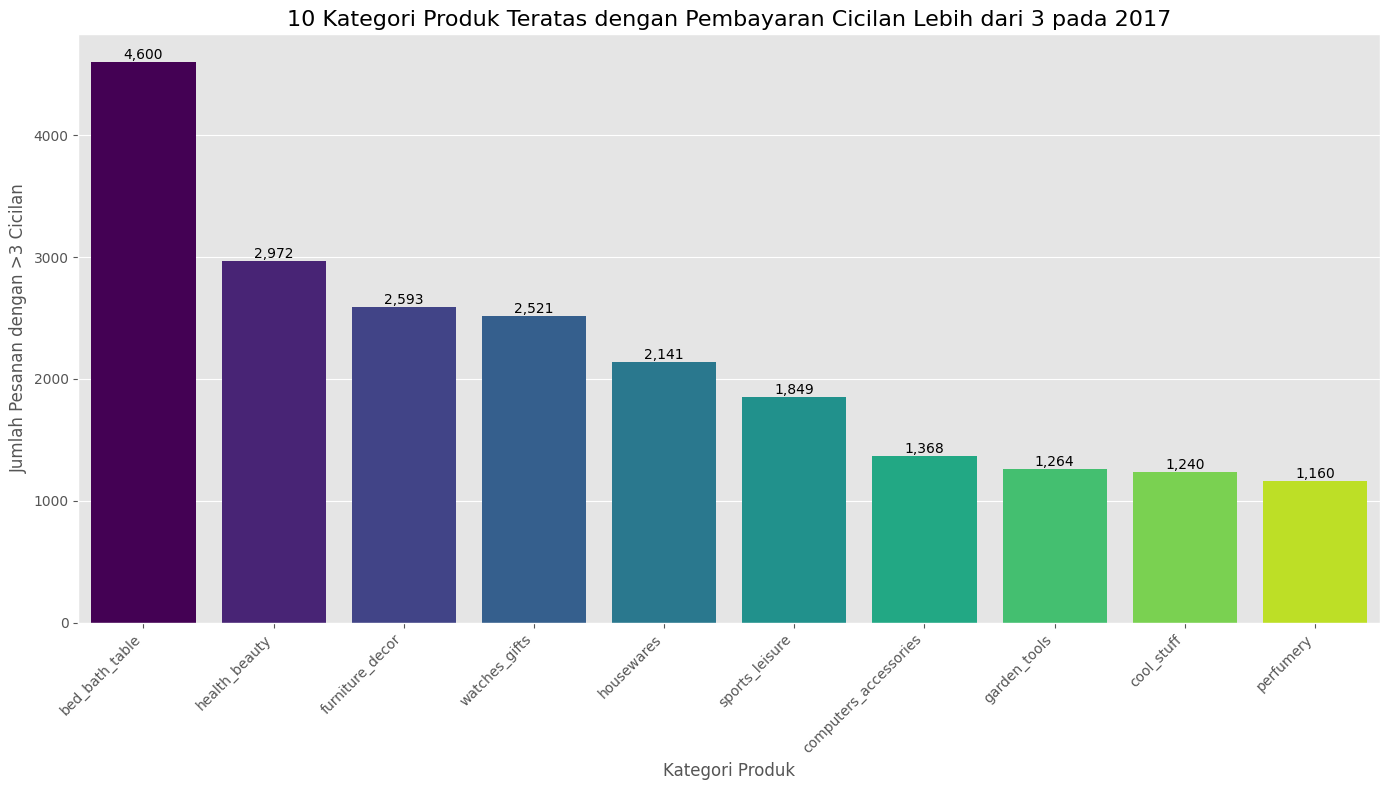

In [170]:
# 2. Visualisasi Kategori Produk dengan Pembayaran Cicilan Lebih dari 3
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=cicilan_category_lebih_3.index[:10], y=cicilan_category_lebih_3.values[:10])
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Jumlah Pesanan dengan >3 Cicilan', fontsize=12)
plt.title('10 Kategori Produk Teratas dengan Pembayaran Cicilan Lebih dari 3 pada 2017', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Tambahkan label nilai di atas setiap batang
for i, nilai in enumerate(cicilan_category_lebih_3.values[:10]):
    ax.text(i, nilai, f'{nilai:,.0f}', ha='center', va='bottom')

# Tambahkan gradien warna pada batang
warna_gradien = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0, vmax=10))
for i, batang in enumerate(ax.patches):
    batang.set_facecolor(warna_gradien.to_rgba(i))

plt.tight_layout()
plt.show()

Explanatory Analysis: Negara bagian dengan transaksi cicilan tertinggi kemungkinan memiliki pengeluaran yang lebih besar untuk produk premium seperti bed,bath dan table. Ini memperlihatkan preferensi belaja yang lebih matang dan skema cicilan jangka panjang untuk memfasilitasi pembelian barang bernilai lebih tinggi


### Pertanyaan 2: Bagaimana perbandingan tingkat ketepatan waktu pengiriman selama periode puncak (November - Desember) 2017 dibandingkan dengan rata-rata bulanan ditahun yang sama? (memakai orders_dataset)


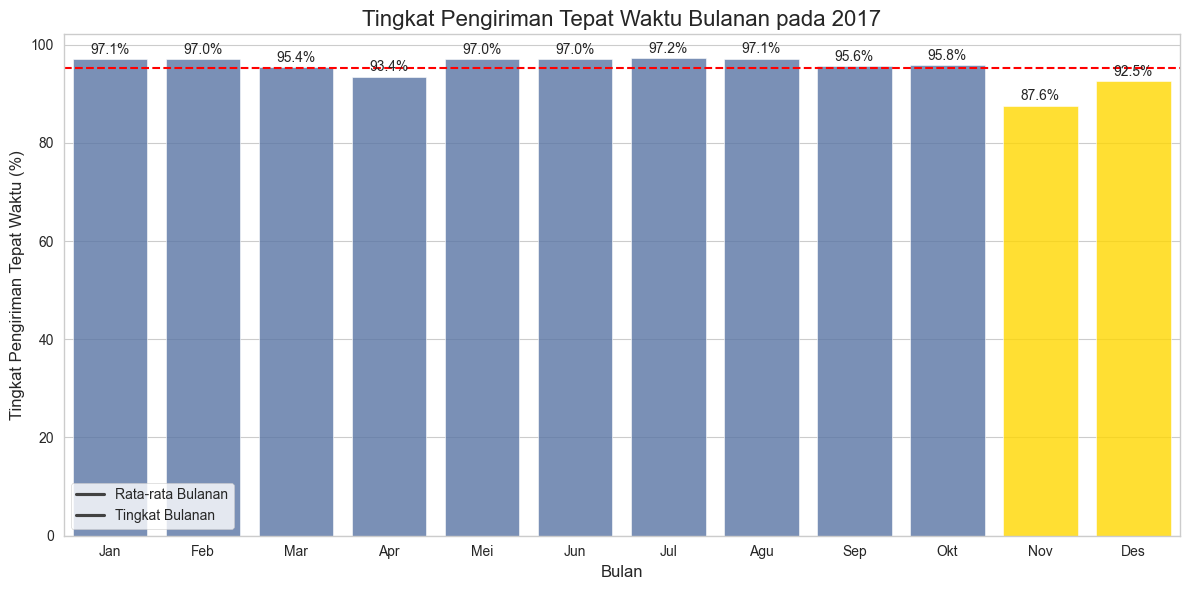

In [171]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")

# Plot tingkat bulanan
ax = sns.barplot(x=tepat_waktu_bulanan.index, y=tepat_waktu_bulanan.values, alpha=0.8)
plt.axhline(y=average_tepat_waktu_bulanan, color='r', linestyle='--', label='Rata-rata Bulanan')

# Sorot periode puncak
bulan_puncak = [11, 12]
for bulan in bulan_puncak:
    ax.patches[bulan-1].set_facecolor('gold')

# Tambahkan label nilai pada batang
for i, v in enumerate(tepat_waktu_bulanan.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Tingkat Pengiriman Tepat Waktu Bulanan pada 2017', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Tingkat Pengiriman Tepat Waktu (%)', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.legend(['Rata-rata Bulanan', 'Tingkat Bulanan'])

plt.tight_layout()
plt.show()

Explanatory Analysis : Penurunan signifikan pada bulan November dapat dipicu oleh lonjakan pesanan akibat promosi besar seperti Black Friday, yang menyebabkan overload pada kapasistas pengiriman


**Insight:**

- Sao Paulo mendominasi dengan 18.089 cicilan, jauh lebih tinggi dibangin bagian lainnya
  -Kategori Bed, Bath and Table adalah yang paling banyak menggunakan cicilan lebih dari 3 kali
  -Pengiriman tepat waktu turun drastis pada bulan November dibanding rata-rata bulanan lainnya


## Analisis Lanjutan (Opsional)


## Conclusion


- Negara bagian dengan transaksi cicilan tertinggi cenderung memiliki minat lebih besar pada produk-produk premium seperti bed, bath, dan table. Hal ini mencerminkan pola belanja yang lebih matang, di mana pembeli memilih cicilan jangka panjang untuk mempermudah pembelian produk bernilai tinggi.
- Penurunan pengiriman tepat waktu pada bulan November kemungkinan disebabkan oleh lonjakan pesanan selama promosi besar seperti Black Friday, yang menyebabkan kapasitas pengiriman kewalahan, mengakibatkan keterlambatan pemrosesan pesanan
